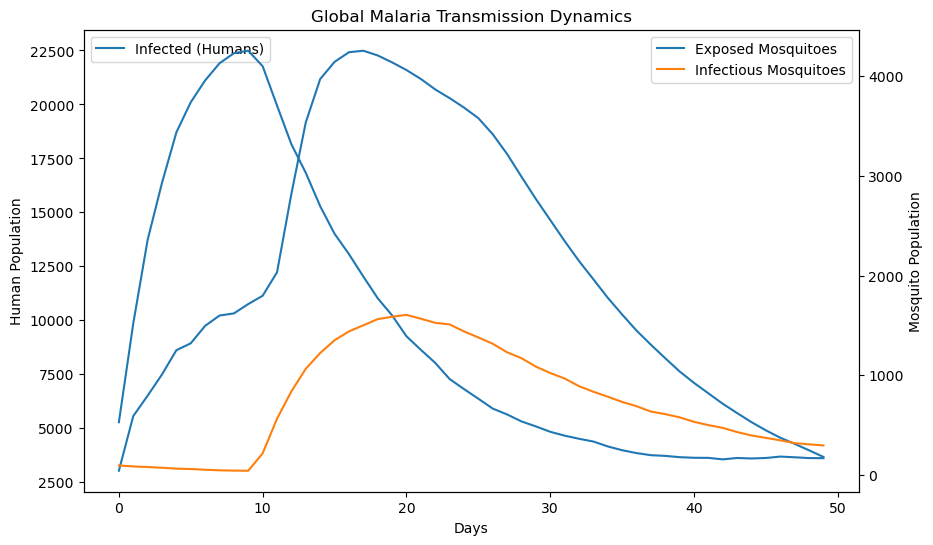

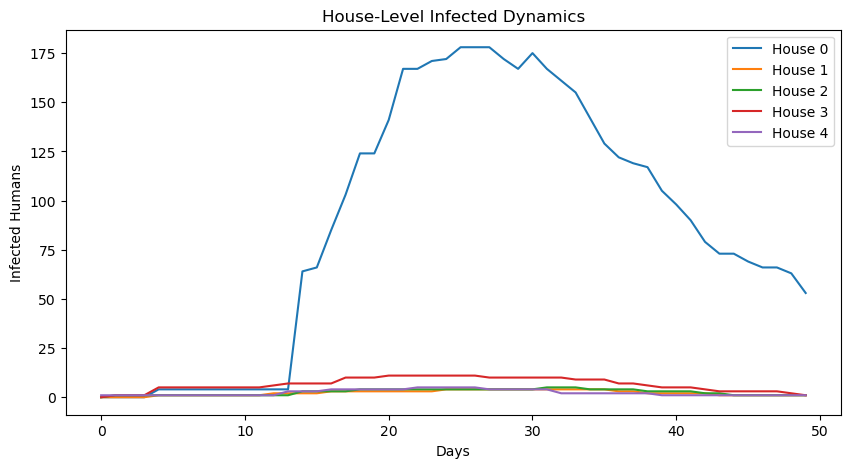

In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def plot_global_stats(global_csv='global_stats.csv'):
    days = []
    S_list = []
    I_list = []
    R_list = []
    E_m_list = []
    I_m_list = []
    total_list = []

    with open(global_csv, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            d = int(row['day'])
            days.append(d)
            S_list.append(int(row['S']))
            I_list.append(int(row['I']))
            R_list.append(int(row['R']))
            E_m_list.append(int(row['E_mos']))
            I_m_list.append(int(row['I_mos']))
            total_list.append(int(row['totalHumans']))
    
    days_arr = np.array(days)

    plt.figure(figsize=(10,6))
    plt.plot(days_arr, I_list, label='Infected (Humans)')
    plt.xlabel('Days')
    plt.ylabel('Human Population')
    plt.legend(loc='upper left')

    plt.twinx()
    plt.plot(days_arr, E_m_list,label='Exposed Mosquitoes')
    plt.plot(days_arr, I_m_list, label='Infectious Mosquitoes')
    plt.ylabel('Mosquito Population')
    plt.legend(loc='upper right')
    plt.title('Global Malaria Transmission Dynamics')
    plt.show()

def plot_house_infected(house_csv='house_infected.csv', houses_to_plot=[0,1,2,3,4]):
    """
    Plots the infected humans for the chosen house IDs over time.
    house_infected.csv has rows: day, houseID, infectedHumans
    We'll group them by houseID to build a time series for each house.
    """

    # We can store infected counts in a dict keyed by house, each a list of daily counts
    house_data = defaultdict(list)
    max_day = 0

    with open(house_csv, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            d = int(row['day'])
            h = int(row['houseID'])
            infected = int(row['infectedHumans'])
            house_data[h].append((d, infected))
            if d > max_day:
                max_day = d
    
    # Now we have e.g. house_data[0] = [(0, inf0), (1, inf1), (2, inf2), ...]
    # We'll plot for each house in houses_to_plot
    plt.figure(figsize=(10,5))
    for h in houses_to_plot:
        # Sort by day just in case
        sorted_vals = sorted(house_data[h], key=lambda x: x[0])
        days = [t[0] for t in sorted_vals]
        infected_arr = [t[1] for t in sorted_vals]
        plt.plot(days, infected_arr, label=f'House {h}')

    plt.xlabel('Days')
    plt.ylabel('Infected Humans')
    plt.title('House-Level Infected Dynamics')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    # Plot global
    plot_global_stats('global_stats.csv')
    # Plot house-level
    plot_house_infected('house_infected.csv', houses_to_plot=[0,1,2,3,4])
